<a href="https://colab.research.google.com/github/NagaramNikhil/Fake-News-Detection/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fake News Detector

# Algorithms Used






*   Logistic Regression

*   Decision Tree Classifier
*   Gradient Boost Classifier(Boosting)


*   Random Forest Classifier(Bagging)



Installing Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Uploading the datasets Fake and True


In [ ]:
data_fake=pd.read_csv('/content/Fake.csv')
data_true=pd.read_csv('/content/True.csv')

Data preview

In [ ]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
data_true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"



Making fake as class 0 and True as 1

In [ ]:

data_fake["class"]=0
data_true['class']=1

shape of the dataset

In [ ]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

*   Last 10 rows of both data_fake and data_true are
stored in separate variables (data_fake_manual_testing
and data_true_manual_testing).
*   Rows with specific indices (from 23480 to 23471) are removed from data_fake.

*   Rows with specific indices (from 21416 to 21407) are removed from data_true.
*   This approach seems like a way of removing specific rows from both datasets (perhaps for testing or manipulation purposes) and storing the last 10 rows for manual inspection or further testing.










In [ ]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis = 0, inplace = True)


data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis = 0, inplace = True)

In [ ]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [ ]:
data_fake_manual_testing['class']=0
data_true_manual_testing['class']=1

<ipython-input-139-350d73592787>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
<ipython-input-139-350d73592787>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class']=1


In [ ]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


Merge two datasets data_true_testing and data_fake_testing into data_merge

In [ ]:
data_merge=pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


"title", "subject" and "date" columns is not required for detecting the fake news, so I am going to drop the columns.

In [ ]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [ ]:
data=data_merge.drop(['title','subject','date'], axis = 1)

In [ ]:
data.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [ ]:
#count of missing values
data.isnull().sum()

,0
text,0
class,0


Randomly shuffling the dataframe

the frac parameter specifies the fraction of rows you want to randomly sample from the dataset. The value of frac should be between 0 and 1

In [ ]:
data = data.sample(frac = 1)

In [ ]:
data.head()

,text,class
9889,WASHINGTON (Reuters) - The White House express...,1
15220,"BEIRUT (Reuters) - Saad al-Hariri, who resigne...",1
4099,Donald Trump has dragged the Republican Party ...,0
10865,Hey parents are you woke yet? A high school ...,0
7607,Christian Fundamentalism is putting American c...,0


In [ ]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [ ]:
data.columns

Index(['text', 'class'], dtype='object')

In [ ]:
data.head(10)

,text,class
0,WASHINGTON (Reuters) - The White House express...,1
1,"BEIRUT (Reuters) - Saad al-Hariri, who resigne...",1
2,Donald Trump has dragged the Republican Party ...,0
3,Hey parents are you woke yet? A high school ...,0
4,Christian Fundamentalism is putting American c...,0
5,WASHINGTON (Reuters) - The U.S. Senate on Thur...,1
6,WASHINGTON (Reuters) - The United States milit...,1
7,The guy who wasn t funny enough to land the co...,0
8,"Recently, Donald Trump shocked even his critic...",0
9,MANILA (Reuters) - The issue of human rights a...,1


# Preprocessing Text
Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.



*   text = text.lower():

This converts the entire input text to lowercase. This step ensures that the text becomes case-insensitive

*   text = re.sub('\[.*?\]','',text):

This removes any text that is enclosed in square brackets
*   text = re.sub("\\W"," ",text):

This replaces any non-word characters (anything other than letters, digits, and underscores) with a space.


*   text = re.sub('https?://\S+|www\.\S+','',text):

This removes any URLs from the text.

*   text = re.sub('<.*?>+',b'',text):

This line removes any HTML tags from the text.
*   text = re.sub('[%s]' % re.escape(string.punctuation),'',text):

This removes all punctuation marks from the text.   re.escape() ensures that all characters in string.punctuation are treated literally in the regular expression

*   text = re.sub('\w*\d\w*','',text):

This removes any words that contain numbers.








In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+',b'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [ ]:
data['text'] = data['text'].apply(wordopt)

Defining dependent and independent variable as x and y

In [ ]:
x = data['text']
y = data['class']

# Training the model
Splitting the dataset into training set and testing set.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

# Extracting Features from the Text
Convert text to vectors

In fraud detection, converting text to vectors (also known as text vectorization) is a crucial step. Most machine learning algorithms, including those used for fraud detection, require numerical inputs. Models such as decision trees, support vector machines (SVM), or neural networks cannot work directly with raw text. Therefore, text data needs to be converted into a numerical representation (vector) before it can be processed.

*   TfidfVectorizer is a feature extraction technique in natural language processing (NLP) that converts a collection of text documents into a matrix of numerical features based on Term Frequency-Inverse Document Frequency (TF-IDF)



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LR.fit(xv_train, y_train)
This step trains the Logistic Regression model using the training data (xv_train, y_train).
xv_train: This is the feature matrix (independent variables) for training, which contains the text data (e.g., vectorized text using TF-IDF).
y_train: This is the target variable (dependent variable) for training, which contains the actual labels (fraudulent or not fraudulent).
The fit() method learns from the training data and finds the best parameters for the model.

In [ ]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

After the model has been trained using the fit() method, this step is used to make predictions on the test data (xv_test).

In [ ]:
pred_lr = LR.predict(xv_test)

The score() method calculates the accuracy of the model on the test data.

In [ ]:
LR.score(xv_test, y_test)

0.9852941176470589

In [ ]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5909
           1       0.98      0.99      0.98      5311

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test)

0.9964349376114082

In [ ]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5909
           1       0.98      0.99      0.98      5311

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



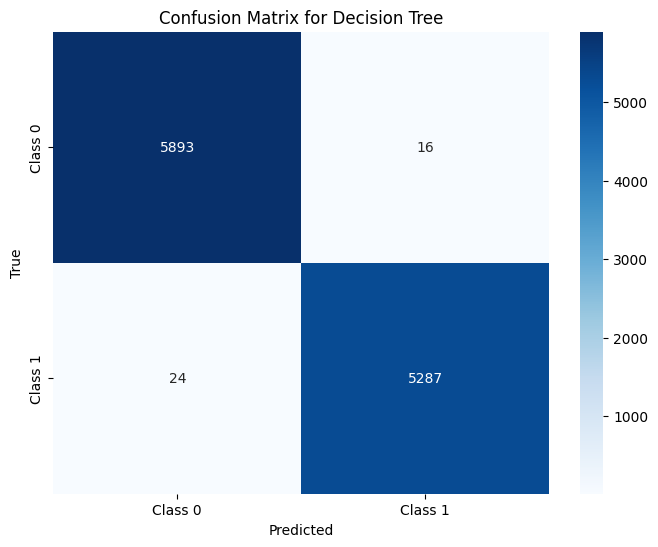

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Gradient Boost Classifier(Boosting): Sequentially builds trees, each correcting the previous tree's errors.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GB = GradientBoostingClassifier(n_estimators=100, random_state=0)
GB.fit(xv_train[:1000], y_train[:1000])

GradientBoostingClassifier(random_state=0)

In [ ]:
pred_gb = GB.predict(xv_test)

In [ ]:
GB.score(xv_test, y_test)

0.9918894830659537

In [ ]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5909
           1       0.99      0.99      0.99      5311

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



# Random Forest Classifier(Bagging): Combines many decision trees to improve accuracy.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(xv_train[:1000], y_train[:1000])

RandomForestClassifier(random_state=0)

In [ ]:
pred_rf = RF.predict(xv_test)

In [ ]:
RF.score(xv_test, y_test)

0.9610516934046346

In [ ]:
print (classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5909
           1       0.96      0.96      0.96      5311

    accuracy                           0.96     11220
   macro avg       0.96      0.96      0.96     11220
weighted avg       0.96      0.96      0.96     11220



# Testing the Model

In [ ]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)

    return print("\n\nLR Predicition: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction:{}".format(output_lable(pred_LR[0]),
                                                                                                             output_lable(pred_DT[0]),
                                                                                                             output_lable(pred_GB[0]),
                                                                                                             output_lable(pred_RF[0])))

# Model Testing With Manual Entry

In [ ]:
news = str(input())
manual_testing(news)

Federal health officials told the AP they have not received any reports of Ebola cases at the Nevada event. A screenshot of a supposed post from the Centers for Disease Control and Prevention confirming such cases was fabricated. And there is no record of a national emergency being declared. The claims emerged after summer storm left muddy roads flooded, stranding tens of thousands of partygoers; event organizers let traffic flow out of the main road Monday afternoon. “So it was announced earlier that Burning Man was declared a national emergency because it was flooded, and so they sent in FEMA,” a woman claims in a TikTok video shared on Instagram, suggesting the development was suspicious. The AP found no record, including on federal websites and in White House announcements, of a national emergency declaration and FEMA confirmed that it was not involved in the situation. “No FEMA personnel or assets have been deployed to the Burning Man festival and there are no requests from local 